# Coursera Capstone Project
## Cars Accident Analysis

###### Author: Abhishek Nair
###### Date: 4 September 2020

### Introduction
Car accidents can be caused due to various reasons. Some of which include; road conditions, weather and visibility conditions. The extent of these factors also affects the severity of the accidents. For example, worse weather conditions lead to accidents more severe than accidents in more favourable weather. This Project aims to draw a connection between these 3 factors and the severity of road accidents using machine learning to create a model. With the help of the model and its results, drivers can accordingly react to prevent accidents. 


In [2]:
import numpy as np
import pandas as pd
import scipy

print("All Libraries Imported")

All Libraries Imported


In [3]:
!wget -O cars.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-09-06 13:51:51--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘cars.csv’

100%[======================================>] 73,917,638  1.09MB/s   in 75s    

2020-09-06 13:53:07 (965 KB/s) - ‘cars.csv’ saved [73917638/73917638]



## The Data

#### The data used here has been provided by the Seattle Police Department and recorded by Traffic Records. This data includes all types of collisions. Collisions will display at the intersection or mid-block of a segment. The time frame of the data is from 2004 to present day. The data had been updated on a weekly basis. For this project, the required columns from the data that will positively affect the machine learning model are “WEATHER”, “ROADCOND” and “LIGHTCOND”. The “SEVERITYCODE” column has some numbers and represent road accident severity in the following way:

#### •	3—fatality
#### •	2b—serious injury 
#### •	2—injury 
#### •	1—prop damage 
#### •	0—unknown


In [4]:
df = pd.read_csv("cars.csv")
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [5]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [6]:
# Drop all columns with no predictive value for the context of this project
df = df.drop(columns = ['OBJECTID', 'SEVERITYCODE.1', 'REPORTNO', 'INCKEY', 'COLDETKEY', 
              'X', 'Y', 'STATUS','ADDRTYPE',
              'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
              'EXCEPTRSNDESC', 'SEVERITYDESC', 'INCDATE',
              'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
              'SDOT_COLDESC', 'PEDROWNOTGRNT', 'SDOTCOLNUM',
              'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY',
              'CROSSWALKKEY', 'HITPARKEDCAR', 'PEDCOUNT', 'PEDCYLCOUNT',
              'PERSONCOUNT', 'VEHCOUNT', 'COLLISIONTYPE',
              'SPEEDING', 'UNDERINFL', 'INATTENTIONIND'])

# Convert column to category
df["WEATHER"] = df["WEATHER"].astype('category')
df["ROADCOND"] = df["ROADCOND"].astype('category')
df["LIGHTCOND"] = df["LIGHTCOND"].astype('category')

# Assign variable to new column for analysis
df["WEATHER_CAT"] = df["WEATHER"].cat.codes
df["ROADCOND_CAT"] = df["ROADCOND"].cat.codes
df["LIGHTCOND_CAT"] = df["LIGHTCOND"].cat.codes

df.head(5)

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,WEATHER_CAT,ROADCOND_CAT,LIGHTCOND_CAT
0,2,Overcast,Wet,Daylight,4,8,5
1,1,Raining,Wet,Dark - Street Lights On,6,8,2
2,1,Overcast,Dry,Daylight,4,0,5
3,1,Clear,Dry,Daylight,1,0,5
4,2,Raining,Wet,Daylight,6,8,5


In [7]:
df["WEATHER"].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [8]:
df["ROADCOND"].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [9]:
df["LIGHTCOND"].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [10]:
df["SEVERITYCODE"].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [11]:
from sklearn.utils import resample

df_majority = df[df.SEVERITYCODE==1]
df_minority = df[df.SEVERITYCODE==2]

#Downsample majority class
df_majority_downsampled = resample(df_majority,
                                        replace=False,
                                        n_samples=58188,
                                        random_state=123)

# Combine minority class with downsampled majority class
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Display new class counts
df_balanced.SEVERITYCODE.value_counts()

2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

In [12]:
X = np.asarray(df_balanced[['WEATHER_CAT', 'ROADCOND_CAT', 'LIGHTCOND_CAT']])
X[0:5]

array([[ 6,  8,  2],
       [ 1,  0,  5],
       [10,  7,  8],
       [ 1,  0,  5],
       [ 1,  0,  5]], dtype=int8)

In [13]:
y = np.asarray(df_balanced['SEVERITYCODE'])
y [0:5]

array([1, 1, 1, 1, 1])

# Normalization

In [14]:
from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 1.15236718,  1.52797946, -1.21648407],
       [-0.67488   , -0.67084969,  0.42978835],
       [ 2.61416492,  1.25312582,  2.07606076],
       [-0.67488   , -0.67084969,  0.42978835],
       [-0.67488   , -0.67084969,  0.42978835]])

In [15]:
# Split data into training set and testing set
# The data has been split such that 75% of the dataset is the training set and 25% is the testing set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (87282, 3) (87282,)
Test set: (29094, 3) (29094,)


# Methodology

#### The machine learning method that we will use here is supervised learning. In this case, the techniques we will use are:

#### 1) K Nearest Neighbour
#### 2) Decision Tree
#### 3) Logistic Regression

# K-Nearest Neighbour

All Libraries Imported 

k = 1 has a Score = 0.5118924864233175 
k = 2 has a Score = 0.5120643431635389 
k = 3 has a Score = 0.5165669897573383 
k = 4 has a Score = 0.5145734515707706 
k = 5 has a Score = 0.5131985976489998 
k = 6 has a Score = 0.5119956004674503 
k = 7 has a Score = 0.5093833780160858 
k = 8 has a Score = 0.5023716230150547 
k = 9 has a Score = 0.5015467106619922 


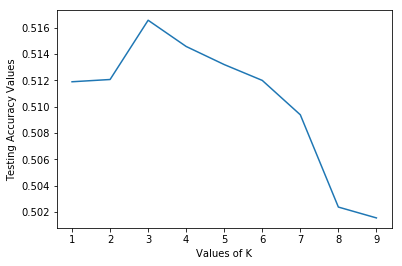

In [16]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
%matplotlib inline

print("All Libraries Imported \n")

k = range(1, 10)
mean_accuracy = []

for n in k:
    knn_model  = knn(n_neighbors = n)
    knn_model.fit(X_train, y_train)
    knn_yhat = knn_model.predict(X_test)
    mean_accuracy.append(accuracy_score(y_test, knn_yhat))
    
for i in range(0, len(mean_accuracy)):
    print("k = {} has a Score = {} ".format(i+1, mean_accuracy[i]))
    
# Relation between k's and their respective accuracies

plt.plot(k, mean_accuracy)
plt.xlabel('Values of K')
plt.ylabel('Testing Accuracy Values')
plt.show()

In [17]:
# k = 3, the model gives the best accuracy

k = 3

knn_model = knn(n_neighbors = k)
knn_model.fit(X_train, y_train)
knn_yhat = knn_model.predict(X_test)

knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [18]:
print(knn_yhat[0:5])
print(y_test[0:5])

[1 1 1 1 1]
[2 2 1 1 1]


# Decision Tree

In [19]:
from sklearn import tree

clf_tree = tree.DecisionTreeClassifier(criterion="entropy", max_depth = 10)
clf_tree = clf_tree.fit(X_train, y_train)
yhat_dt = clf_tree.predict(X_test)
yhat_dt

array([2, 2, 1, ..., 2, 1, 2])

In [20]:
print (yhat_dt [0:5])
print (y_test [0:5])

[2 2 1 1 2]
[2 2 1 1 1]


# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=6, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=6, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [22]:
LRyhat = LR.predict(X_test)
LRyhat

array([1, 2, 1, ..., 2, 1, 2])

In [23]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.57263745, 0.42736255],
       [0.47083235, 0.52916765],
       [0.67438763, 0.32561237],
       ...,
       [0.47083235, 0.52916765],
       [0.68326727, 0.31673273],
       [0.46947758, 0.53052242]])

In [24]:
print (LRyhat [0:5])
print (y_test [0:5])

[1 2 1 1 1]
[2 2 1 1 1]


# Results Evaulation

In [25]:
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import jaccard_similarity_score

print("Packages Installed")

Packages Installed


## K Nearest Neighbour 

In [26]:
# Jaccard Similarity Score
print("Jaccard Similarity Score: ", jaccard_similarity_score(y_test, knn_yhat))

# F1 SCORE
print("F1 Score:                 ", f1_score(y_test, knn_yhat, average='macro'))

Jaccard Similarity Score:  0.5165669897573383
F1 Score:                  0.46423304964062817


## Decision Tree

In [27]:
# Jaccard Similarity Score
print("Jaccard Similarity Score: ", jaccard_similarity_score(y_test, yhat_dt))

# F1 SCORE
print("F1 Score:                 ", f1_score(y_test, yhat_dt, average='macro'))

Jaccard Similarity Score:  0.5669210146421942
F1 Score:                  0.5432143427250284


## Logistic Regression

In [28]:
# Jaccard Similarity Score
print("Jaccard Similarity Score: ", jaccard_similarity_score(y_test, LRyhat))

# F1 SCORE
print("F1 Score:                 ", f1_score(y_test, LRyhat, average='macro'))

# Log Loss
yhat_prob = LR.predict_proba(X_test)
print("Log Loss:                 ", log_loss(y_test, yhat_prob))

Jaccard Similarity Score:  0.5274283357393277
F1 Score:                  0.5127901543870825
Log Loss:                  0.6849604847680921


# Conclusion

### It is shown that the Decision Tree model is able to output the most accurate model and hence used to model the dataset